# Mapper Tutorial

brief explanation with references..

In [1]:
import pandas as pd
import numpy as np

import sys; sys.path.append("../giotto-learn/") # <--- TMP!!!
from giotto import mapper as mp
#from giotto.mapper import visualize

import networkx as nx

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors as mcolors
import seaborn as sns
import plotly.graph_objects as go

sns.set()

# Load data

The dataset contains 500 3D points sampled from a Santa Claus shape. The so called "Santa Cloud".

In [2]:
df = pd.read_csv("data.csv")
df.head()

,x,y,z,color
0,0.469986,0.276702,0.112556,red
1,0.114129,0.774016,0.015158,white
2,-0.080747,-0.999135,0.000718,black
3,0.239434,0.297960,-0.001429,red
4,-0.243728,-0.230000,0.223468,white


Let's have a look at this 3-dimensional point cloud

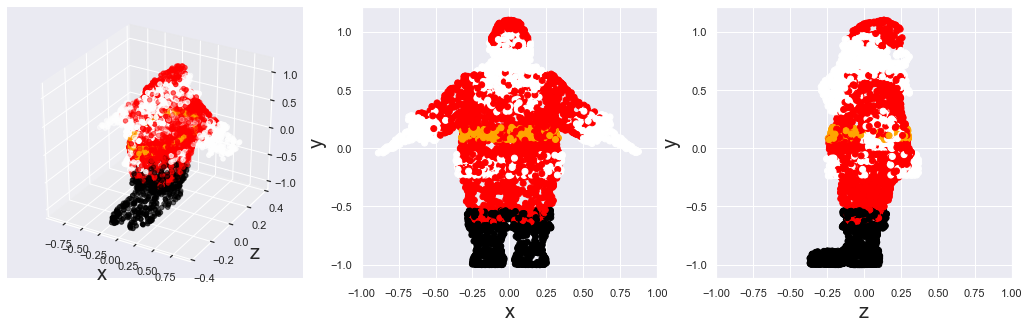

In [3]:
fig = plt.figure(figsize = (18,5))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(df.x, df.z, df.y, c = list(df.color.values))
plt.xlabel("x",size = 20)
plt.ylabel("z",size = 20)

plt.subplot(132)
plt.scatter(df.x,df.y, c = list(df.color.values))
plt.xlabel("x",size = 20)
plt.ylabel("y",size = 20)
plt.xlim(-1,1)


plt.subplot(133)
plt.scatter(df.z,df.y, c = list(df.color.values))
plt.xlabel("z",size = 20)
plt.ylabel("y",size = 20)
plt.xlim(-1,1)

plt.show()

# All at once

At first, let's see what we can obtain

In [4]:
X = df[["x","y","z"]].values

In [5]:
pipeline = mp.mapper.make_mapper_pipeline(filter_func = None,
                                          cover=mp.cover.CubicalCover(n_intervals = 20, overlap_frac = 0.25),
                                          verbose=True,
                                         )

graph = pipeline.fit_transform(X)

[Pipeline] ............ (step 1 of 3) Processing scaler, total=   0.0s
[Pipeline] ....... (step 2 of 3) Processing filter_func, total=   0.0s
[Pipeline] ............. (step 3 of 3) Processing cover, total=   0.2s
[Pipeline] .... (step 1 of 3) Processing pullback_cover, total=   0.2s
[Pipeline] ........ (step 2 of 3) Processing clustering, total=   1.4s
[Pipeline] ............. (step 3 of 3) Processing nerve, total=  37.3s


In [36]:
# get cluster member indices
node_elements = graph.vs.get_attribute_values('elements')
# calculate number of members per node
node_sizes = [len(el) for el in node_elements]

In [83]:
# define node coloring by mean value
#node_colors = [df.loc[el,"color"].value_counts().index[0] for el in node_elements]
node_colors = [np.mean(X[el]) for el in node_elements]
#node_colors = ["rgb(254, 254, 190)" for el in node_elements]

In [85]:
# configure choice of layout
#layout = graph.layout("random",dim=3)
layout = [X[el].mean(axis = 0) for el in node_elements]

In [86]:
# initialise figure
fig = mp.visualize.create_network_3d(graph, layout, node_colors, node_scale=12)
# display figure
fig.show()

In [94]:
mp.visualize.create_interactive_network(pipeline, X, node_pos = X)

[Pipeline] ............ (step 1 of 3) Processing scaler, total=   0.0s
[Pipeline] ....... (step 2 of 3) Processing filter_func, total=   0.0s
[Pipeline] ............. (step 3 of 3) Processing cover, total=   0.2s
[Pipeline] .... (step 1 of 3) Processing pullback_cover, total=   0.2s
[Pipeline] ........ (step 2 of 3) Processing clustering, total=   1.9s
[Pipeline] ............. (step 3 of 3) Processing nerve, total=  58.5s


# Step-by-step

now we explain step-by-step

## 1) Scaler


## 2) filter_func


## 3) cover


## 4) pullback_cover 


## 5) clustering


## 6) Nerve [?]